In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 73.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 118.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [18]:
# French corpus of 19 texts from ECHR (official translations with manual annotations)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='FR-manual-official.tsv', column_delimiter=' ',
                                    dev_file=None,
                                    test_file=None
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2023-11-23 12:14:15,750 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2023-11-23 12:14:15,751 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/FR-manual-OT-PER.tsv
2023-11-23 12:14:15,753 Dev: None
2023-11-23 12:14:15,753 Test: None
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 905,
        "number_of_documents_per_class": {
            "CODE": 26,
            "LOC": 155,
            "PER": 141,
            "DATE": 325,
            "LEGAL_PROFESSIONAL": 240,
            "ORG": 90,
            "NATIONALITY": 47,
            "TIME": 7,
            "QUANTITY": 61,
            "ETHNIC_CATEGORY": 6,
            "CURRENCY": 1,
            "null": 1
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 26262,
            "min": 1,
            "max": 136,
            "avg": 29.01878453038674
        }
    },
    "TEST": {
        "dataset": "TEST",
        "to

In [19]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2023-11-23 12:14:31,129 Computing label dictionary. Progress:


905it [00:00, 49984.13it/s]

2023-11-23 12:14:31,199 Dictionary created for label 'ner' with 13 values: DATE (seen 325 times), LEGAL_PROFESSIONAL (seen 240 times), LOC (seen 155 times), PER (seen 141 times), ORG (seen 90 times), QUANTITY (seen 61 times), NATIONALITY (seen 47 times), CODE (seen 26 times), TIME (seen 7 times), ETHNIC_CATEGORY (seen 6 times), CURRENCY (seen 1 times), null (seen 1 times)
[b'<unk>', b'DATE', b'LEGAL_PROFESSIONAL', b'LOC', b'PER', b'ORG', b'QUANTITY', b'NATIONALITY', b'CODE', b'TIME', b'ETHNIC_CATEGORY', b'CURRENCY', b'null']


In [20]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-french")

pytorch_model.bin:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

2023-11-23 12:14:54,706 SequenceTagger predicts: Dictionary with 19 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-MISC, B-MISC, E-MISC, I-MISC, S-ORG, B-ORG, E-ORG, I-ORG, <START>, <STOP>


In [21]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2023-11-23 12:14:57,817 SequenceTagger predicts: Dictionary with 49 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-TIME, B-TIME, E-TIME, I-TIME, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-null, B-null, E-null, I-null


In [22]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [23]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=25,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2023-11-23 12:15:09,454 ----------------------------------------------------------------------------------------------------
2023-11-23 12:15:09,457 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '0-/vol/home-vol2/ml/akbikala/.flair/embeddings/fr-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(275, 100)
        (rnn): LSTM(100, 1024)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=2348, out_features=2348, bias=True)
  (rnn): LSTM(2348, 256, batch_first=True, bidirectional=True)
  (linea

100%|██████████| 4/4 [00:01<00:00,  3.17it/s]

2023-11-23 12:15:24,833 Evaluating as a multi-label problem: False
2023-11-23 12:15:24,851 DEV : loss 0.5391870737075806 - f1-score (micro avg)  0.0261
2023-11-23 12:15:24,863 BAD EPOCHS (no improvement): 0
2023-11-23 12:15:24,867 saving best model


2023-11-23 12:15:28,480 ----------------------------------------------------------------------------------------------------
2023-11-23 12:15:28,789 epoch 2 - iter 2/29 - loss 0.65019811 - time (sec): 0.31 - samples/sec: 5912.88 - lr: 0.100000
2023-11-23 12:15:31,522 epoch 2 - iter 4/29 - loss 0.59211013 - time (sec): 3.04 - samples/sec: 1160.81 - lr: 0.100000
2023-11-23 12:15:32,343 epoch 2 - iter 6/29 - loss 0.55755777 - time (sec): 3.86 - samples/sec: 1458.02 - lr: 0.100000
2023-11-23 12:15:33,243 epoch 2 - iter 8/29 - loss 0.54536702 - time (sec): 4.76 - samples/sec: 1581.08 - lr: 0.100000
2023-11-23 12:15:33,980 epoch 2 - iter 10/29 - loss 0.50968315 - time (sec): 5.50 - samples/sec: 1651.86 - lr: 0.100000
2023-11-23 12:15:34,782 epoch 2 - iter 12/29 - loss 0.50130008 - time (sec): 6.30 - samples/sec: 1726.42 - lr: 0.100000
2023-11-23 12:15:35,553 epoch 2 - iter 14/29 - loss 0.47642561 - time (sec): 7.07 - samples/sec: 1807.03 - lr: 0.100000
2023-11-23 12:15:36,431 epoch 2 - iter 

100%|██████████| 4/4 [00:00<00:00,  4.80it/s]

2023-11-23 12:15:43,171 Evaluating as a multi-label problem: False
2023-11-23 12:15:43,185 DEV : loss 0.3086382746696472 - f1-score (micro avg)  0.2773
2023-11-23 12:15:43,197 BAD EPOCHS (no improvement): 0
2023-11-23 12:15:43,217 saving best model


2023-11-23 12:15:47,646 ----------------------------------------------------------------------------------------------------
2023-11-23 12:15:47,986 epoch 3 - iter 2/29 - loss 0.32769997 - time (sec): 0.31 - samples/sec: 5304.54 - lr: 0.100000
2023-11-23 12:15:50,397 epoch 3 - iter 4/29 - loss 0.31147414 - time (sec): 2.72 - samples/sec: 1382.75 - lr: 0.100000
2023-11-23 12:15:51,219 epoch 3 - iter 6/29 - loss 0.28777027 - time (sec): 3.54 - samples/sec: 1622.68 - lr: 0.100000
2023-11-23 12:15:52,013 epoch 3 - iter 8/29 - loss 0.28736444 - time (sec): 4.34 - samples/sec: 1736.27 - lr: 0.100000
2023-11-23 12:15:52,791 epoch 3 - iter 10/29 - loss 0.30118727 - time (sec): 5.12 - samples/sec: 1873.67 - lr: 0.100000
2023-11-23 12:15:53,599 epoch 3 - iter 12/29 - loss 0.31325203 - time (sec): 5.92 - samples/sec: 1891.20 - lr: 0.100000
2023-11-23 12:15:54,527 epoch 3 - iter 14/29 - loss 0.30239834 - time (sec): 6.85 - samples/sec: 1905.94 - lr: 0.100000
2023-11-23 12:15:55,392 epoch 3 - iter 

100%|██████████| 4/4 [00:00<00:00,  5.14it/s]

2023-11-23 12:16:02,256 Evaluating as a multi-label problem: False
2023-11-23 12:16:02,271 DEV : loss 0.27276894450187683 - f1-score (micro avg)  0.262
2023-11-23 12:16:02,286 BAD EPOCHS (no improvement): 1
2023-11-23 12:16:02,290 ----------------------------------------------------------------------------------------------------


2023-11-23 12:16:02,654 epoch 4 - iter 2/29 - loss 0.32407157 - time (sec): 0.36 - samples/sec: 4821.56 - lr: 0.100000
2023-11-23 12:16:03,532 epoch 4 - iter 4/29 - loss 0.30756995 - time (sec): 1.24 - samples/sec: 2975.85 - lr: 0.100000
2023-11-23 12:16:04,411 epoch 4 - iter 6/29 - loss 0.30247780 - time (sec): 2.12 - samples/sec: 2697.40 - lr: 0.100000
2023-11-23 12:16:05,264 epoch 4 - iter 8/29 - loss 0.31040959 - time (sec): 2.97 - samples/sec: 2482.71 - lr: 0.100000
2023-11-23 12:16:06,110 epoch 4 - iter 10/29 - loss 0.30633844 - time (sec): 3.82 - samples/sec: 2408.16 - lr: 0.100000
2023-11-23 12:16:06,896 epoch 4 - iter 12/29 - loss 0.28197715 - time (sec): 4.60 - samples/sec: 2354.69 - lr: 0.100000
2023-11-23 12:16:07,723 epoch 4 - iter 14/29 - loss 0.27692489 - time (sec): 5.43 - samples/sec: 2314.02 - lr: 0.100000
2023-11-23 12:16:08,623 epoch 4 - iter 16/29 - loss 0.26478464 - time (sec): 6.33 - samples/sec: 2363.67 - lr: 0.100000
2023-11-23 12:16:09,446 epoch 4 - iter 18/29

100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

2023-11-23 12:16:15,047 Evaluating as a multi-label problem: False
2023-11-23 12:16:15,060 DEV : loss 0.20633277297019958 - f1-score (micro avg)  0.4979
2023-11-23 12:16:15,074 BAD EPOCHS (no improvement): 0
2023-11-23 12:16:15,093 saving best model


2023-11-23 12:16:18,824 ----------------------------------------------------------------------------------------------------
2023-11-23 12:16:19,154 epoch 5 - iter 2/29 - loss 0.24979370 - time (sec): 0.33 - samples/sec: 5393.06 - lr: 0.100000
2023-11-23 12:16:22,271 epoch 5 - iter 4/29 - loss 0.21887136 - time (sec): 3.44 - samples/sec: 1094.68 - lr: 0.100000
2023-11-23 12:16:23,154 epoch 5 - iter 6/29 - loss 0.21826653 - time (sec): 4.33 - samples/sec: 1337.47 - lr: 0.100000
2023-11-23 12:16:24,047 epoch 5 - iter 8/29 - loss 0.22295577 - time (sec): 5.22 - samples/sec: 1442.56 - lr: 0.100000
2023-11-23 12:16:24,933 epoch 5 - iter 10/29 - loss 0.23294794 - time (sec): 6.11 - samples/sec: 1534.02 - lr: 0.100000
2023-11-23 12:16:25,754 epoch 5 - iter 12/29 - loss 0.22124315 - time (sec): 6.93 - samples/sec: 1652.25 - lr: 0.100000
2023-11-23 12:16:26,534 epoch 5 - iter 14/29 - loss 0.22109650 - time (sec): 7.71 - samples/sec: 1706.37 - lr: 0.100000
2023-11-23 12:16:27,431 epoch 5 - iter 

100%|██████████| 4/4 [00:00<00:00,  4.04it/s]

2023-11-23 12:16:34,516 Evaluating as a multi-label problem: False
2023-11-23 12:16:34,535 DEV : loss 0.1502496600151062 - f1-score (micro avg)  0.5597
2023-11-23 12:16:34,550 BAD EPOCHS (no improvement): 0
2023-11-23 12:16:34,554 saving best model


2023-11-23 12:16:38,488 ----------------------------------------------------------------------------------------------------
2023-11-23 12:16:38,833 epoch 6 - iter 2/29 - loss 0.15175163 - time (sec): 0.32 - samples/sec: 5937.92 - lr: 0.100000
2023-11-23 12:16:41,268 epoch 6 - iter 4/29 - loss 0.17239477 - time (sec): 2.75 - samples/sec: 1374.09 - lr: 0.100000
2023-11-23 12:16:42,432 epoch 6 - iter 6/29 - loss 0.16090942 - time (sec): 3.92 - samples/sec: 1414.91 - lr: 0.100000
2023-11-23 12:16:43,327 epoch 6 - iter 8/29 - loss 0.16434668 - time (sec): 4.81 - samples/sec: 1527.91 - lr: 0.100000
2023-11-23 12:16:44,367 epoch 6 - iter 10/29 - loss 0.18438253 - time (sec): 5.85 - samples/sec: 1571.32 - lr: 0.100000
2023-11-23 12:16:45,264 epoch 6 - iter 12/29 - loss 0.18250876 - time (sec): 6.75 - samples/sec: 1635.38 - lr: 0.100000
2023-11-23 12:16:46,494 epoch 6 - iter 14/29 - loss 0.17685239 - time (sec): 7.98 - samples/sec: 1603.99 - lr: 0.100000
2023-11-23 12:16:47,368 epoch 6 - iter 

100%|██████████| 4/4 [00:00<00:00,  5.42it/s]

2023-11-23 12:16:53,900 Evaluating as a multi-label problem: False
2023-11-23 12:16:53,913 DEV : loss 0.12390325963497162 - f1-score (micro avg)  0.6899
2023-11-23 12:16:53,925 BAD EPOCHS (no improvement): 0
2023-11-23 12:16:53,929 saving best model


2023-11-23 12:16:57,662 ----------------------------------------------------------------------------------------------------
2023-11-23 12:16:57,972 epoch 7 - iter 2/29 - loss 0.14212664 - time (sec): 0.31 - samples/sec: 5100.00 - lr: 0.100000
2023-11-23 12:17:01,129 epoch 7 - iter 4/29 - loss 0.15353552 - time (sec): 3.46 - samples/sec: 1023.03 - lr: 0.100000
2023-11-23 12:17:01,909 epoch 7 - iter 6/29 - loss 0.15342288 - time (sec): 4.24 - samples/sec: 1287.72 - lr: 0.100000
2023-11-23 12:17:02,727 epoch 7 - iter 8/29 - loss 0.14326382 - time (sec): 5.06 - samples/sec: 1443.73 - lr: 0.100000
2023-11-23 12:17:03,548 epoch 7 - iter 10/29 - loss 0.14232705 - time (sec): 5.88 - samples/sec: 1585.36 - lr: 0.100000
2023-11-23 12:17:04,467 epoch 7 - iter 12/29 - loss 0.15141558 - time (sec): 6.80 - samples/sec: 1667.13 - lr: 0.100000
2023-11-23 12:17:05,373 epoch 7 - iter 14/29 - loss 0.14853448 - time (sec): 7.71 - samples/sec: 1694.92 - lr: 0.100000
2023-11-23 12:17:06,251 epoch 7 - iter 

100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

2023-11-23 12:17:12,673 Evaluating as a multi-label problem: False
2023-11-23 12:17:12,689 DEV : loss 0.11159615218639374 - f1-score (micro avg)  0.7313
2023-11-23 12:17:12,704 BAD EPOCHS (no improvement): 0
2023-11-23 12:17:12,708 saving best model


2023-11-23 12:17:16,535 ----------------------------------------------------------------------------------------------------
2023-11-23 12:17:16,847 epoch 8 - iter 2/29 - loss 0.13646748 - time (sec): 0.31 - samples/sec: 5750.42 - lr: 0.100000
2023-11-23 12:17:19,949 epoch 8 - iter 4/29 - loss 0.14555196 - time (sec): 3.41 - samples/sec: 1027.57 - lr: 0.100000
2023-11-23 12:17:20,727 epoch 8 - iter 6/29 - loss 0.15276731 - time (sec): 4.19 - samples/sec: 1273.13 - lr: 0.100000
2023-11-23 12:17:21,547 epoch 8 - iter 8/29 - loss 0.15528313 - time (sec): 5.01 - samples/sec: 1417.29 - lr: 0.100000
2023-11-23 12:17:22,338 epoch 8 - iter 10/29 - loss 0.14895353 - time (sec): 5.80 - samples/sec: 1525.76 - lr: 0.100000
2023-11-23 12:17:23,147 epoch 8 - iter 12/29 - loss 0.13352906 - time (sec): 6.61 - samples/sec: 1625.48 - lr: 0.100000
2023-11-23 12:17:23,924 epoch 8 - iter 14/29 - loss 0.15634176 - time (sec): 7.39 - samples/sec: 1694.98 - lr: 0.100000
2023-11-23 12:17:24,798 epoch 8 - iter 

100%|██████████| 4/4 [00:00<00:00,  5.09it/s]

2023-11-23 12:17:31,558 Evaluating as a multi-label problem: False
2023-11-23 12:17:31,576 DEV : loss 0.11249380558729172 - f1-score (micro avg)  0.7194
2023-11-23 12:17:31,593 BAD EPOCHS (no improvement): 1
2023-11-23 12:17:31,598 ----------------------------------------------------------------------------------------------------


2023-11-23 12:17:31,954 epoch 9 - iter 2/29 - loss 0.13655317 - time (sec): 0.35 - samples/sec: 5038.59 - lr: 0.100000
2023-11-23 12:17:32,857 epoch 9 - iter 4/29 - loss 0.12391125 - time (sec): 1.26 - samples/sec: 2858.32 - lr: 0.100000
2023-11-23 12:17:33,755 epoch 9 - iter 6/29 - loss 0.11640756 - time (sec): 2.16 - samples/sec: 2493.51 - lr: 0.100000
2023-11-23 12:17:34,614 epoch 9 - iter 8/29 - loss 0.11200169 - time (sec): 3.01 - samples/sec: 2306.02 - lr: 0.100000
2023-11-23 12:17:35,533 epoch 9 - iter 10/29 - loss 0.10772498 - time (sec): 3.93 - samples/sec: 2267.10 - lr: 0.100000
2023-11-23 12:17:36,433 epoch 9 - iter 12/29 - loss 0.12039275 - time (sec): 4.83 - samples/sec: 2287.62 - lr: 0.100000
2023-11-23 12:17:37,377 epoch 9 - iter 14/29 - loss 0.11208979 - time (sec): 5.78 - samples/sec: 2259.87 - lr: 0.100000
2023-11-23 12:17:38,266 epoch 9 - iter 16/29 - loss 0.11497910 - time (sec): 6.67 - samples/sec: 2224.34 - lr: 0.100000
2023-11-23 12:17:39,268 epoch 9 - iter 18/29

100%|██████████| 4/4 [00:00<00:00,  5.43it/s]

2023-11-23 12:17:45,062 Evaluating as a multi-label problem: False
2023-11-23 12:17:45,074 DEV : loss 0.08157232403755188 - f1-score (micro avg)  0.8137
2023-11-23 12:17:45,087 BAD EPOCHS (no improvement): 0
2023-11-23 12:17:45,091 saving best model


2023-11-23 12:17:48,796 ----------------------------------------------------------------------------------------------------
2023-11-23 12:17:49,196 epoch 10 - iter 2/29 - loss 0.14666970 - time (sec): 0.37 - samples/sec: 5828.61 - lr: 0.100000
2023-11-23 12:17:52,322 epoch 10 - iter 4/29 - loss 0.10461015 - time (sec): 3.50 - samples/sec: 1171.31 - lr: 0.100000
2023-11-23 12:17:53,202 epoch 10 - iter 6/29 - loss 0.09989790 - time (sec): 4.38 - samples/sec: 1316.53 - lr: 0.100000
2023-11-23 12:17:53,947 epoch 10 - iter 8/29 - loss 0.10535499 - time (sec): 5.12 - samples/sec: 1491.19 - lr: 0.100000
2023-11-23 12:17:54,737 epoch 10 - iter 10/29 - loss 0.10623001 - time (sec): 5.91 - samples/sec: 1612.21 - lr: 0.100000
2023-11-23 12:17:55,574 epoch 10 - iter 12/29 - loss 0.10542897 - time (sec): 6.75 - samples/sec: 1705.54 - lr: 0.100000
2023-11-23 12:17:56,418 epoch 10 - iter 14/29 - loss 0.11280800 - time (sec): 7.59 - samples/sec: 1750.13 - lr: 0.100000
2023-11-23 12:17:57,210 epoch 10

100%|██████████| 4/4 [00:00<00:00,  5.16it/s]

2023-11-23 12:18:04,212 Evaluating as a multi-label problem: False
2023-11-23 12:18:04,226 DEV : loss 0.07744386792182922 - f1-score (micro avg)  0.8123
2023-11-23 12:18:04,241 BAD EPOCHS (no improvement): 1
2023-11-23 12:18:04,245 ----------------------------------------------------------------------------------------------------


2023-11-23 12:18:04,598 epoch 11 - iter 2/29 - loss 0.09973867 - time (sec): 0.35 - samples/sec: 5487.59 - lr: 0.100000
2023-11-23 12:18:05,470 epoch 11 - iter 4/29 - loss 0.10425482 - time (sec): 1.22 - samples/sec: 2976.68 - lr: 0.100000
2023-11-23 12:18:06,343 epoch 11 - iter 6/29 - loss 0.10546251 - time (sec): 2.10 - samples/sec: 2687.23 - lr: 0.100000
2023-11-23 12:18:07,171 epoch 11 - iter 8/29 - loss 0.09446505 - time (sec): 2.92 - samples/sec: 2557.01 - lr: 0.100000
2023-11-23 12:18:08,048 epoch 11 - iter 10/29 - loss 0.10644028 - time (sec): 3.80 - samples/sec: 2401.18 - lr: 0.100000
2023-11-23 12:18:08,994 epoch 11 - iter 12/29 - loss 0.11238499 - time (sec): 4.75 - samples/sec: 2346.81 - lr: 0.100000
2023-11-23 12:18:09,832 epoch 11 - iter 14/29 - loss 0.10851280 - time (sec): 5.59 - samples/sec: 2296.27 - lr: 0.100000
2023-11-23 12:18:10,729 epoch 11 - iter 16/29 - loss 0.10318649 - time (sec): 6.48 - samples/sec: 2279.33 - lr: 0.100000
2023-11-23 12:18:11,583 epoch 11 - i

100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

2023-11-23 12:18:17,498 Evaluating as a multi-label problem: False
2023-11-23 12:18:17,510 DEV : loss 0.07588072866201401 - f1-score (micro avg)  0.7891
2023-11-23 12:18:17,523 BAD EPOCHS (no improvement): 2
2023-11-23 12:18:17,526 ----------------------------------------------------------------------------------------------------


2023-11-23 12:18:17,808 epoch 12 - iter 2/29 - loss 0.09068743 - time (sec): 0.28 - samples/sec: 6084.62 - lr: 0.100000
2023-11-23 12:18:18,617 epoch 12 - iter 4/29 - loss 0.06560268 - time (sec): 1.09 - samples/sec: 3283.83 - lr: 0.100000
2023-11-23 12:18:19,388 epoch 12 - iter 6/29 - loss 0.08454285 - time (sec): 1.86 - samples/sec: 3047.38 - lr: 0.100000
2023-11-23 12:18:20,154 epoch 12 - iter 8/29 - loss 0.08981135 - time (sec): 2.63 - samples/sec: 2880.45 - lr: 0.100000
2023-11-23 12:18:20,928 epoch 12 - iter 10/29 - loss 0.08629459 - time (sec): 3.40 - samples/sec: 2716.42 - lr: 0.100000
2023-11-23 12:18:21,815 epoch 12 - iter 12/29 - loss 0.08457772 - time (sec): 4.29 - samples/sec: 2657.82 - lr: 0.100000
2023-11-23 12:18:22,628 epoch 12 - iter 14/29 - loss 0.09893629 - time (sec): 5.10 - samples/sec: 2666.96 - lr: 0.100000
2023-11-23 12:18:23,416 epoch 12 - iter 16/29 - loss 0.09963530 - time (sec): 5.89 - samples/sec: 2622.53 - lr: 0.100000
2023-11-23 12:18:24,141 epoch 12 - i

100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

2023-11-23 12:18:29,431 Evaluating as a multi-label problem: False
2023-11-23 12:18:29,450 DEV : loss 0.06763917952775955 - f1-score (micro avg)  0.7601
2023-11-23 12:18:29,463 BAD EPOCHS (no improvement): 3
2023-11-23 12:18:29,467 ----------------------------------------------------------------------------------------------------


2023-11-23 12:18:29,757 epoch 13 - iter 2/29 - loss 0.08022286 - time (sec): 0.29 - samples/sec: 6085.45 - lr: 0.100000
2023-11-23 12:18:30,584 epoch 13 - iter 4/29 - loss 0.06994545 - time (sec): 1.12 - samples/sec: 3265.61 - lr: 0.100000
2023-11-23 12:18:31,425 epoch 13 - iter 6/29 - loss 0.11535256 - time (sec): 1.96 - samples/sec: 2714.33 - lr: 0.100000
2023-11-23 12:18:32,292 epoch 13 - iter 8/29 - loss 0.10432857 - time (sec): 2.82 - samples/sec: 2493.32 - lr: 0.100000
2023-11-23 12:18:33,136 epoch 13 - iter 10/29 - loss 0.09667442 - time (sec): 3.67 - samples/sec: 2500.47 - lr: 0.100000
2023-11-23 12:18:33,951 epoch 13 - iter 12/29 - loss 0.09512720 - time (sec): 4.48 - samples/sec: 2479.34 - lr: 0.100000
2023-11-23 12:18:34,782 epoch 13 - iter 14/29 - loss 0.09408045 - time (sec): 5.31 - samples/sec: 2479.19 - lr: 0.100000
2023-11-23 12:18:35,542 epoch 13 - iter 16/29 - loss 0.09319675 - time (sec): 6.07 - samples/sec: 2443.71 - lr: 0.100000
2023-11-23 12:18:36,368 epoch 13 - i

100%|██████████| 4/4 [00:00<00:00,  5.74it/s]

2023-11-23 12:18:41,743 Evaluating as a multi-label problem: False
2023-11-23 12:18:41,757 DEV : loss 0.05858645588159561 - f1-score (micro avg)  0.8615
2023-11-23 12:18:41,770 BAD EPOCHS (no improvement): 0
2023-11-23 12:18:41,775 saving best model


2023-11-23 12:18:45,377 ----------------------------------------------------------------------------------------------------
2023-11-23 12:18:45,720 epoch 14 - iter 2/29 - loss 0.03740392 - time (sec): 0.34 - samples/sec: 5272.06 - lr: 0.100000
2023-11-23 12:18:48,872 epoch 14 - iter 4/29 - loss 0.07303527 - time (sec): 3.49 - samples/sec: 1079.74 - lr: 0.100000
2023-11-23 12:18:49,657 epoch 14 - iter 6/29 - loss 0.07645741 - time (sec): 4.28 - samples/sec: 1330.52 - lr: 0.100000
2023-11-23 12:18:50,424 epoch 14 - iter 8/29 - loss 0.08251372 - time (sec): 5.04 - samples/sec: 1498.56 - lr: 0.100000
2023-11-23 12:18:51,218 epoch 14 - iter 10/29 - loss 0.07669317 - time (sec): 5.84 - samples/sec: 1636.32 - lr: 0.100000
2023-11-23 12:18:51,965 epoch 14 - iter 12/29 - loss 0.07998782 - time (sec): 6.59 - samples/sec: 1730.68 - lr: 0.100000
2023-11-23 12:18:52,730 epoch 14 - iter 14/29 - loss 0.07241338 - time (sec): 7.35 - samples/sec: 1795.69 - lr: 0.100000
2023-11-23 12:18:53,499 epoch 14

100%|██████████| 4/4 [00:00<00:00,  5.11it/s]

2023-11-23 12:18:59,824 Evaluating as a multi-label problem: False
2023-11-23 12:18:59,837 DEV : loss 0.06741438060998917 - f1-score (micro avg)  0.7881
2023-11-23 12:18:59,850 BAD EPOCHS (no improvement): 1
2023-11-23 12:18:59,853 ----------------------------------------------------------------------------------------------------


2023-11-23 12:19:00,144 epoch 15 - iter 2/29 - loss 0.08108286 - time (sec): 0.29 - samples/sec: 5814.95 - lr: 0.100000
2023-11-23 12:19:01,016 epoch 15 - iter 4/29 - loss 0.07415477 - time (sec): 1.16 - samples/sec: 3028.06 - lr: 0.100000
2023-11-23 12:19:01,971 epoch 15 - iter 6/29 - loss 0.11331857 - time (sec): 2.12 - samples/sec: 2615.42 - lr: 0.100000
2023-11-23 12:19:02,884 epoch 15 - iter 8/29 - loss 0.09748045 - time (sec): 3.03 - samples/sec: 2430.30 - lr: 0.100000
2023-11-23 12:19:03,791 epoch 15 - iter 10/29 - loss 0.09454989 - time (sec): 3.94 - samples/sec: 2288.44 - lr: 0.100000
2023-11-23 12:19:04,662 epoch 15 - iter 12/29 - loss 0.08989408 - time (sec): 4.81 - samples/sec: 2258.09 - lr: 0.100000
2023-11-23 12:19:05,559 epoch 15 - iter 14/29 - loss 0.08734251 - time (sec): 5.70 - samples/sec: 2267.42 - lr: 0.100000
2023-11-23 12:19:06,403 epoch 15 - iter 16/29 - loss 0.08801569 - time (sec): 6.55 - samples/sec: 2261.53 - lr: 0.100000
2023-11-23 12:19:07,259 epoch 15 - i

100%|██████████| 4/4 [00:00<00:00,  5.71it/s]

2023-11-23 12:19:12,672 Evaluating as a multi-label problem: False
2023-11-23 12:19:12,685 DEV : loss 0.05551736801862717 - f1-score (micro avg)  0.834
2023-11-23 12:19:12,699 BAD EPOCHS (no improvement): 2
2023-11-23 12:19:12,703 ----------------------------------------------------------------------------------------------------


2023-11-23 12:19:13,061 epoch 16 - iter 2/29 - loss 0.07478152 - time (sec): 0.36 - samples/sec: 5361.71 - lr: 0.100000
2023-11-23 12:19:13,825 epoch 16 - iter 4/29 - loss 0.07929916 - time (sec): 1.12 - samples/sec: 3355.21 - lr: 0.100000
2023-11-23 12:19:14,671 epoch 16 - iter 6/29 - loss 0.10131336 - time (sec): 1.97 - samples/sec: 2953.22 - lr: 0.100000
2023-11-23 12:19:15,514 epoch 16 - iter 8/29 - loss 0.09997830 - time (sec): 2.81 - samples/sec: 2703.84 - lr: 0.100000
2023-11-23 12:19:16,356 epoch 16 - iter 10/29 - loss 0.09905892 - time (sec): 3.65 - samples/sec: 2632.49 - lr: 0.100000
2023-11-23 12:19:17,153 epoch 16 - iter 12/29 - loss 0.09412407 - time (sec): 4.45 - samples/sec: 2554.49 - lr: 0.100000
2023-11-23 12:19:17,985 epoch 16 - iter 14/29 - loss 0.08989097 - time (sec): 5.28 - samples/sec: 2514.30 - lr: 0.100000
2023-11-23 12:19:18,832 epoch 16 - iter 16/29 - loss 0.08482250 - time (sec): 6.13 - samples/sec: 2456.76 - lr: 0.100000
2023-11-23 12:19:19,601 epoch 16 - i

100%|██████████| 4/4 [00:01<00:00,  3.73it/s]

2023-11-23 12:19:25,385 Evaluating as a multi-label problem: False
2023-11-23 12:19:25,397 DEV : loss 0.053732410073280334 - f1-score (micro avg)  0.809
2023-11-23 12:19:25,409 BAD EPOCHS (no improvement): 3
2023-11-23 12:19:25,412 ----------------------------------------------------------------------------------------------------


2023-11-23 12:19:25,766 epoch 17 - iter 2/29 - loss 0.03141959 - time (sec): 0.35 - samples/sec: 5885.15 - lr: 0.100000
2023-11-23 12:19:26,571 epoch 17 - iter 4/29 - loss 0.04751241 - time (sec): 1.16 - samples/sec: 3402.35 - lr: 0.100000
2023-11-23 12:19:27,280 epoch 17 - iter 6/29 - loss 0.06917232 - time (sec): 1.87 - samples/sec: 3040.53 - lr: 0.100000
2023-11-23 12:19:28,126 epoch 17 - iter 8/29 - loss 0.07147441 - time (sec): 2.71 - samples/sec: 2804.81 - lr: 0.100000
2023-11-23 12:19:28,889 epoch 17 - iter 10/29 - loss 0.07862825 - time (sec): 3.48 - samples/sec: 2664.33 - lr: 0.100000
2023-11-23 12:19:29,741 epoch 17 - iter 12/29 - loss 0.07211606 - time (sec): 4.33 - samples/sec: 2579.18 - lr: 0.100000
2023-11-23 12:19:30,656 epoch 17 - iter 14/29 - loss 0.07125582 - time (sec): 5.24 - samples/sec: 2479.66 - lr: 0.100000
2023-11-23 12:19:31,660 epoch 17 - iter 16/29 - loss 0.07018679 - time (sec): 6.25 - samples/sec: 2410.67 - lr: 0.100000
2023-11-23 12:19:32,475 epoch 17 - i

100%|██████████| 4/4 [00:00<00:00,  5.67it/s]

2023-11-23 12:19:37,899 Evaluating as a multi-label problem: False
2023-11-23 12:19:37,911 DEV : loss 0.052805095911026 - f1-score (micro avg)  0.8327
2023-11-23 12:19:37,924 Epoch    17: reducing learning rate of group 0 to 5.0000e-02.
2023-11-23 12:19:37,926 BAD EPOCHS (no improvement): 4
2023-11-23 12:19:37,930 ----------------------------------------------------------------------------------------------------


2023-11-23 12:19:38,319 epoch 18 - iter 2/29 - loss 0.06913704 - time (sec): 0.39 - samples/sec: 5911.94 - lr: 0.050000
2023-11-23 12:19:39,090 epoch 18 - iter 4/29 - loss 0.06025846 - time (sec): 1.16 - samples/sec: 3425.96 - lr: 0.050000
2023-11-23 12:19:40,009 epoch 18 - iter 6/29 - loss 0.05428191 - time (sec): 2.08 - samples/sec: 2874.26 - lr: 0.050000
2023-11-23 12:19:40,999 epoch 18 - iter 8/29 - loss 0.05814925 - time (sec): 3.07 - samples/sec: 2541.17 - lr: 0.050000
2023-11-23 12:19:41,877 epoch 18 - iter 10/29 - loss 0.05886404 - time (sec): 3.95 - samples/sec: 2482.26 - lr: 0.050000
2023-11-23 12:19:42,753 epoch 18 - iter 12/29 - loss 0.07699487 - time (sec): 4.82 - samples/sec: 2412.88 - lr: 0.050000
2023-11-23 12:19:43,664 epoch 18 - iter 14/29 - loss 0.07558067 - time (sec): 5.73 - samples/sec: 2339.76 - lr: 0.050000
2023-11-23 12:19:44,443 epoch 18 - iter 16/29 - loss 0.07338297 - time (sec): 6.51 - samples/sec: 2309.91 - lr: 0.050000
2023-11-23 12:19:45,313 epoch 18 - i

100%|██████████| 4/4 [00:00<00:00,  5.26it/s]

2023-11-23 12:19:51,217 Evaluating as a multi-label problem: False
2023-11-23 12:19:51,231 DEV : loss 0.04804500192403793 - f1-score (micro avg)  0.8539
2023-11-23 12:19:51,246 BAD EPOCHS (no improvement): 1
2023-11-23 12:19:51,250 ----------------------------------------------------------------------------------------------------


2023-11-23 12:19:51,579 epoch 19 - iter 2/29 - loss 0.04970771 - time (sec): 0.33 - samples/sec: 5252.51 - lr: 0.050000
2023-11-23 12:19:52,421 epoch 19 - iter 4/29 - loss 0.03679038 - time (sec): 1.17 - samples/sec: 3282.34 - lr: 0.050000
2023-11-23 12:19:53,303 epoch 19 - iter 6/29 - loss 0.04299800 - time (sec): 2.05 - samples/sec: 2865.11 - lr: 0.050000
2023-11-23 12:19:54,130 epoch 19 - iter 8/29 - loss 0.04175870 - time (sec): 2.88 - samples/sec: 2644.89 - lr: 0.050000
2023-11-23 12:19:55,008 epoch 19 - iter 10/29 - loss 0.05740196 - time (sec): 3.76 - samples/sec: 2550.99 - lr: 0.050000
2023-11-23 12:19:55,945 epoch 19 - iter 12/29 - loss 0.05880556 - time (sec): 4.69 - samples/sec: 2464.72 - lr: 0.050000
2023-11-23 12:19:56,809 epoch 19 - iter 14/29 - loss 0.05523922 - time (sec): 5.56 - samples/sec: 2401.25 - lr: 0.050000
2023-11-23 12:19:57,610 epoch 19 - iter 16/29 - loss 0.05607379 - time (sec): 6.36 - samples/sec: 2345.13 - lr: 0.050000
2023-11-23 12:19:58,499 epoch 19 - i

100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

2023-11-23 12:20:04,298 Evaluating as a multi-label problem: False
2023-11-23 12:20:04,312 DEV : loss 0.045146409422159195 - f1-score (micro avg)  0.8494
2023-11-23 12:20:04,326 BAD EPOCHS (no improvement): 2
2023-11-23 12:20:04,330 ----------------------------------------------------------------------------------------------------


2023-11-23 12:20:04,721 epoch 20 - iter 2/29 - loss 0.06138501 - time (sec): 0.39 - samples/sec: 5289.89 - lr: 0.050000
2023-11-23 12:20:05,611 epoch 20 - iter 4/29 - loss 0.04767926 - time (sec): 1.28 - samples/sec: 2971.90 - lr: 0.050000
2023-11-23 12:20:06,496 epoch 20 - iter 6/29 - loss 0.05351074 - time (sec): 2.16 - samples/sec: 2661.72 - lr: 0.050000
2023-11-23 12:20:07,306 epoch 20 - iter 8/29 - loss 0.05319453 - time (sec): 2.97 - samples/sec: 2533.14 - lr: 0.050000
2023-11-23 12:20:08,131 epoch 20 - iter 10/29 - loss 0.05014624 - time (sec): 3.80 - samples/sec: 2409.62 - lr: 0.050000
2023-11-23 12:20:08,913 epoch 20 - iter 12/29 - loss 0.04842534 - time (sec): 4.58 - samples/sec: 2356.41 - lr: 0.050000
2023-11-23 12:20:09,761 epoch 20 - iter 14/29 - loss 0.04836740 - time (sec): 5.43 - samples/sec: 2323.37 - lr: 0.050000
2023-11-23 12:20:10,601 epoch 20 - iter 16/29 - loss 0.04751400 - time (sec): 6.27 - samples/sec: 2293.30 - lr: 0.050000
2023-11-23 12:20:11,474 epoch 20 - i

100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

2023-11-23 12:20:17,305 Evaluating as a multi-label problem: False
2023-11-23 12:20:17,318 DEV : loss 0.043368853628635406 - f1-score (micro avg)  0.8571
2023-11-23 12:20:17,331 BAD EPOCHS (no improvement): 3
2023-11-23 12:20:17,335 ----------------------------------------------------------------------------------------------------


2023-11-23 12:20:17,631 epoch 21 - iter 2/29 - loss 0.03732710 - time (sec): 0.29 - samples/sec: 5673.96 - lr: 0.050000
2023-11-23 12:20:18,479 epoch 21 - iter 4/29 - loss 0.11169709 - time (sec): 1.14 - samples/sec: 3061.88 - lr: 0.050000
2023-11-23 12:20:19,328 epoch 21 - iter 6/29 - loss 0.09801091 - time (sec): 1.99 - samples/sec: 2646.99 - lr: 0.050000
2023-11-23 12:20:20,163 epoch 21 - iter 8/29 - loss 0.08463098 - time (sec): 2.83 - samples/sec: 2439.19 - lr: 0.050000
2023-11-23 12:20:20,997 epoch 21 - iter 10/29 - loss 0.07437694 - time (sec): 3.66 - samples/sec: 2341.99 - lr: 0.050000
2023-11-23 12:20:21,803 epoch 21 - iter 12/29 - loss 0.06893536 - time (sec): 4.47 - samples/sec: 2327.95 - lr: 0.050000
2023-11-23 12:20:22,628 epoch 21 - iter 14/29 - loss 0.06487539 - time (sec): 5.29 - samples/sec: 2348.05 - lr: 0.050000
2023-11-23 12:20:23,415 epoch 21 - iter 16/29 - loss 0.06155270 - time (sec): 6.08 - samples/sec: 2366.30 - lr: 0.050000
2023-11-23 12:20:24,190 epoch 21 - i

100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

2023-11-23 12:20:29,642 Evaluating as a multi-label problem: False
2023-11-23 12:20:29,655 DEV : loss 0.04185185581445694 - f1-score (micro avg)  0.8482
2023-11-23 12:20:29,668 Epoch    21: reducing learning rate of group 0 to 2.5000e-02.
2023-11-23 12:20:29,669 BAD EPOCHS (no improvement): 4
2023-11-23 12:20:29,673 ----------------------------------------------------------------------------------------------------


2023-11-23 12:20:30,322 epoch 22 - iter 2/29 - loss 0.04992181 - time (sec): 0.65 - samples/sec: 2663.83 - lr: 0.025000
2023-11-23 12:20:31,103 epoch 22 - iter 4/29 - loss 0.03827794 - time (sec): 1.43 - samples/sec: 2562.84 - lr: 0.025000
2023-11-23 12:20:31,940 epoch 22 - iter 6/29 - loss 0.03587912 - time (sec): 2.27 - samples/sec: 2413.67 - lr: 0.025000
2023-11-23 12:20:32,859 epoch 22 - iter 8/29 - loss 0.03749159 - time (sec): 3.19 - samples/sec: 2355.79 - lr: 0.025000
2023-11-23 12:20:33,722 epoch 22 - iter 10/29 - loss 0.03869436 - time (sec): 4.05 - samples/sec: 2308.88 - lr: 0.025000
2023-11-23 12:20:34,626 epoch 22 - iter 12/29 - loss 0.04113236 - time (sec): 4.95 - samples/sec: 2288.73 - lr: 0.025000
2023-11-23 12:20:35,477 epoch 22 - iter 14/29 - loss 0.04274883 - time (sec): 5.80 - samples/sec: 2283.95 - lr: 0.025000
2023-11-23 12:20:36,321 epoch 22 - iter 16/29 - loss 0.04193670 - time (sec): 6.65 - samples/sec: 2224.34 - lr: 0.025000
2023-11-23 12:20:37,128 epoch 22 - i

100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

2023-11-23 12:20:42,292 Evaluating as a multi-label problem: False
2023-11-23 12:20:42,304 DEV : loss 0.03922658413648605 - f1-score (micro avg)  0.8726
2023-11-23 12:20:42,318 BAD EPOCHS (no improvement): 0
2023-11-23 12:20:42,321 saving best model


2023-11-23 12:20:45,821 ----------------------------------------------------------------------------------------------------
2023-11-23 12:20:46,181 epoch 23 - iter 2/29 - loss 0.04323848 - time (sec): 0.33 - samples/sec: 5193.58 - lr: 0.025000
2023-11-23 12:20:49,367 epoch 23 - iter 4/29 - loss 0.03678538 - time (sec): 3.52 - samples/sec: 1034.16 - lr: 0.025000
2023-11-23 12:20:50,235 epoch 23 - iter 6/29 - loss 0.05360861 - time (sec): 4.39 - samples/sec: 1296.71 - lr: 0.025000
2023-11-23 12:20:51,130 epoch 23 - iter 8/29 - loss 0.05651448 - time (sec): 5.28 - samples/sec: 1401.49 - lr: 0.025000
2023-11-23 12:20:52,059 epoch 23 - iter 10/29 - loss 0.04994573 - time (sec): 6.21 - samples/sec: 1484.08 - lr: 0.025000
2023-11-23 12:20:52,882 epoch 23 - iter 12/29 - loss 0.04561836 - time (sec): 7.03 - samples/sec: 1558.25 - lr: 0.025000
2023-11-23 12:20:53,668 epoch 23 - iter 14/29 - loss 0.04398170 - time (sec): 7.82 - samples/sec: 1647.49 - lr: 0.025000
2023-11-23 12:20:54,464 epoch 23

100%|██████████| 4/4 [00:00<00:00,  5.51it/s]

2023-11-23 12:21:00,834 Evaluating as a multi-label problem: False
2023-11-23 12:21:00,847 DEV : loss 0.03887264057993889 - f1-score (micro avg)  0.8837
2023-11-23 12:21:00,861 BAD EPOCHS (no improvement): 0
2023-11-23 12:21:00,864 saving best model


2023-11-23 12:21:04,639 ----------------------------------------------------------------------------------------------------
2023-11-23 12:21:04,982 epoch 24 - iter 2/29 - loss 0.03914506 - time (sec): 0.34 - samples/sec: 5248.78 - lr: 0.025000
2023-11-23 12:21:08,041 epoch 24 - iter 4/29 - loss 0.04032080 - time (sec): 3.40 - samples/sec: 1130.77 - lr: 0.025000
2023-11-23 12:21:08,859 epoch 24 - iter 6/29 - loss 0.03601112 - time (sec): 4.22 - samples/sec: 1381.22 - lr: 0.025000
2023-11-23 12:21:09,603 epoch 24 - iter 8/29 - loss 0.03891637 - time (sec): 4.96 - samples/sec: 1548.91 - lr: 0.025000
2023-11-23 12:21:10,362 epoch 24 - iter 10/29 - loss 0.03376168 - time (sec): 5.72 - samples/sec: 1657.92 - lr: 0.025000
2023-11-23 12:21:11,158 epoch 24 - iter 12/29 - loss 0.03508670 - time (sec): 6.52 - samples/sec: 1723.78 - lr: 0.025000
2023-11-23 12:21:11,893 epoch 24 - iter 14/29 - loss 0.03453358 - time (sec): 7.25 - samples/sec: 1778.24 - lr: 0.025000
2023-11-23 12:21:12,758 epoch 24

100%|██████████| 4/4 [00:00<00:00,  5.40it/s]

2023-11-23 12:21:19,129 Evaluating as a multi-label problem: False
2023-11-23 12:21:19,146 DEV : loss 0.03664454445242882 - f1-score (micro avg)  0.8915
2023-11-23 12:21:19,163 BAD EPOCHS (no improvement): 0
2023-11-23 12:21:19,167 saving best model


2023-11-23 12:21:22,893 ----------------------------------------------------------------------------------------------------
2023-11-23 12:21:23,251 epoch 25 - iter 2/29 - loss 0.02654141 - time (sec): 0.33 - samples/sec: 5926.19 - lr: 0.025000
2023-11-23 12:21:26,401 epoch 25 - iter 4/29 - loss 0.04144734 - time (sec): 3.48 - samples/sec: 1104.29 - lr: 0.025000
2023-11-23 12:21:27,140 epoch 25 - iter 6/29 - loss 0.03558515 - time (sec): 4.22 - samples/sec: 1304.51 - lr: 0.025000
2023-11-23 12:21:27,905 epoch 25 - iter 8/29 - loss 0.04123213 - time (sec): 4.98 - samples/sec: 1484.03 - lr: 0.025000
2023-11-23 12:21:28,700 epoch 25 - iter 10/29 - loss 0.04066760 - time (sec): 5.78 - samples/sec: 1605.30 - lr: 0.025000
2023-11-23 12:21:29,466 epoch 25 - iter 12/29 - loss 0.03950623 - time (sec): 6.54 - samples/sec: 1713.79 - lr: 0.025000
2023-11-23 12:21:30,200 epoch 25 - iter 14/29 - loss 0.03866621 - time (sec): 7.28 - samples/sec: 1775.45 - lr: 0.025000
2023-11-23 12:21:30,961 epoch 25

100%|██████████| 4/4 [00:00<00:00,  5.27it/s]

2023-11-23 12:21:37,675 Evaluating as a multi-label problem: False
2023-11-23 12:21:37,687 DEV : loss 0.03747584670782089 - f1-score (micro avg)  0.8828
2023-11-23 12:21:37,703 BAD EPOCHS (no improvement): 1


2023-11-23 12:21:41,290 ----------------------------------------------------------------------------------------------------
2023-11-23 12:21:44,959 SequenceTagger predicts: Dictionary with 51 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-TIME, B-TIME, E-TIME, I-TIME, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-null, B-null, E-null, I-null, <START>


100%|██████████| 4/4 [00:00<00:00,  5.32it/s]

2023-11-23 12:21:46,084 Evaluating as a multi-label problem: False
2023-11-23 12:21:46,097 0.8435	0.8267	0.835	0.7425
2023-11-23 12:21:46,098 
Results:
- F-score (micro) 0.835
- F-score (macro) 0.6034
- Accuracy 0.7425

By class:
                    precision    recall  f1-score   support

              DATE     0.9750    0.9750    0.9750        40
               LOC     0.9032    0.9032    0.9032        31
LEGAL_PROFESSIONAL     0.8095    1.0000    0.8947        17
          QUANTITY     0.6667    0.5556    0.6061        18
               PER     1.0000    0.8235    0.9032        17
               ORG     0.5556    0.8333    0.6667        12
       NATIONALITY     0.8000    1.0000    0.8889         4
              CODE     1.0000    0.6667    0.8000         3
          CURRENCY     0.0000    0.0000    0.0000         3
              TIME     0.0000    0.0000    0.0000         2
   ETHNIC_CATEGORY     0.0000    0.0000    0.0000         3

         micro avg     0.8435    0.8267    0.835

{'test_score': 0.835016835016835,
 'dev_score_history': [0.02608695652173913,
  0.2773109243697479,
  0.2619808306709266,
  0.49785407725321884,
  0.5596707818930041,
  0.689922480620155,
  0.7313432835820896,
  0.7193675889328064,
  0.8136882129277566,
  0.8122605363984673,
  0.7890625,
  0.7601476014760147,
  0.8615384615384615,
  0.788104089219331,
  0.8339768339768341,
  0.8089887640449438,
  0.8326848249027237,
  0.853932584269663,
  0.8494208494208494,
  0.8571428571428571,
  0.8482490272373541,
  0.8725868725868725,
  0.883720930232558,
  0.8914728682170543,
  0.8828125],
 'train_loss_history': [0.9541528411416685,
  0.43470242286561855,
  0.3144906543467034,
  0.25734706916719025,
  0.21825091639655206,
  0.1850263912092567,
  0.15552962618874228,
  0.14338015790995545,
  0.12998497933682698,
  0.11435586105577926,
  0.10389093705972507,
  0.09974433934368099,
  0.08324687732036783,
  0.08586189282220985,
  0.07889336154662631,
  0.07618990061388603,
  0.07007381168162412,
  0.

2023-11-23 12:21:46,118 ----------------------------------------------------------------------------------------------------
2023-11-23 12:21:46,118 WARNING: No LOSS found for test split in this data.
2023-11-23 12:21:46,119 Are you sure you want to plot LOSS and not another value?
2023-11-23 12:21:46,120 ----------------------------------------------------------------------------------------------------
2023-11-23 12:21:46,144 ----------------------------------------------------------------------------------------------------
2023-11-23 12:21:46,145 WARNING: No F1 found for test split in this data.
2023-11-23 12:21:46,146 Are you sure you want to plot F1 and not another value?
2023-11-23 12:21:46,147 ----------------------------------------------------------------------------------------------------
2023-11-23 12:21:47,221 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-manual-FR/Flair-manual-model-FR-OT/training.png


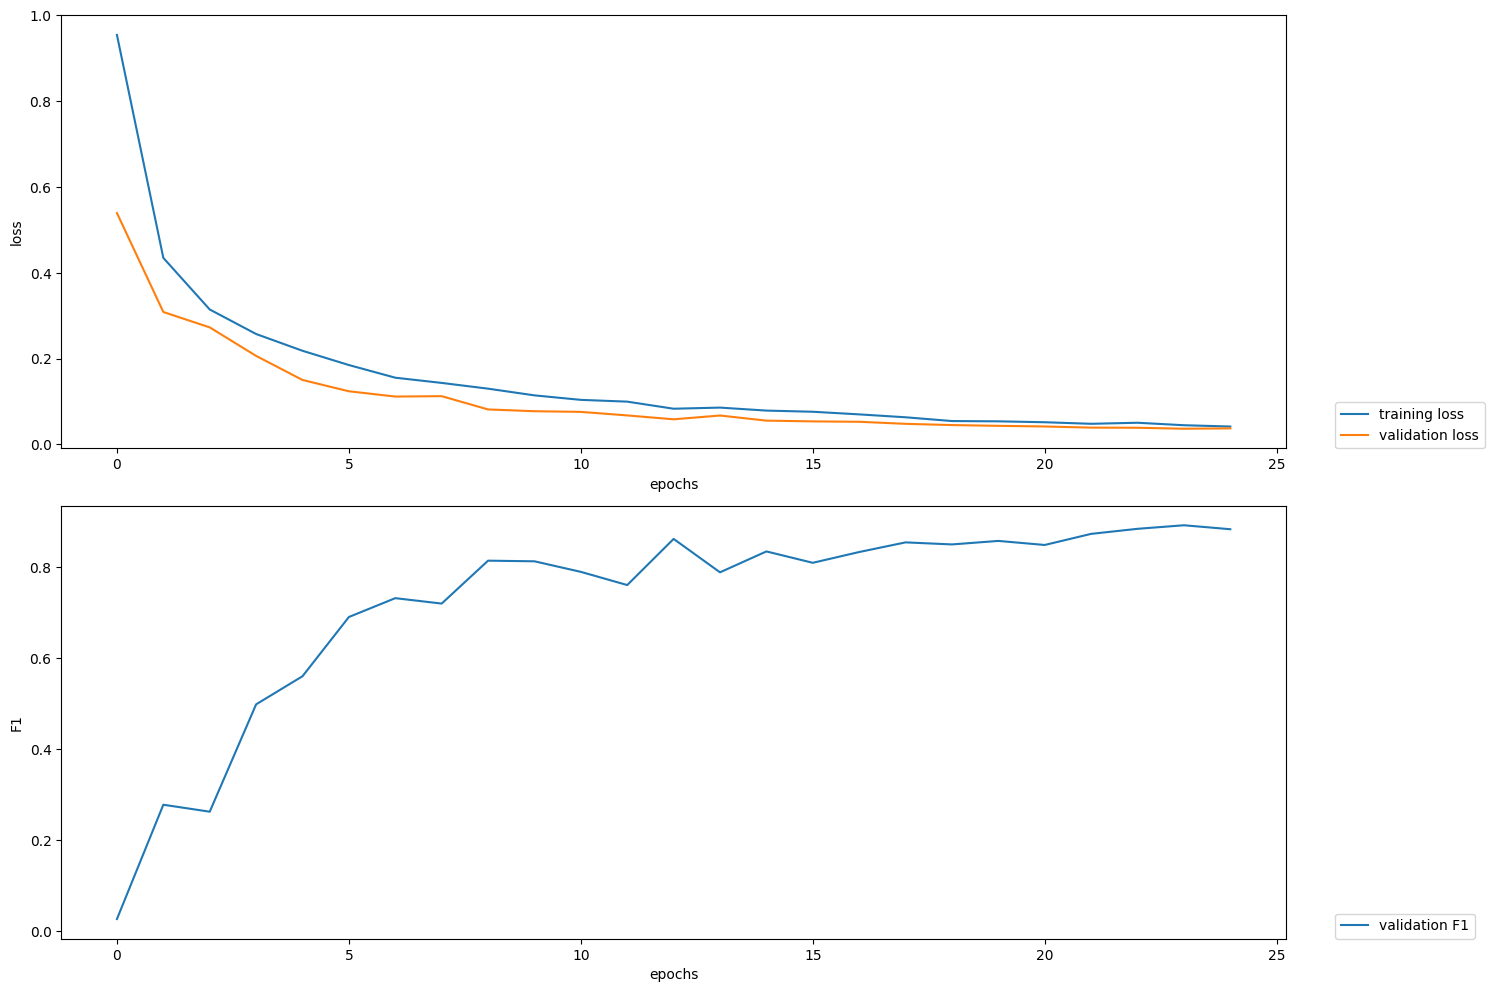

2023-11-23 12:21:50,649 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-FR/Flair-manual-FR/Flair-manual-model-FR-OT/weights.png


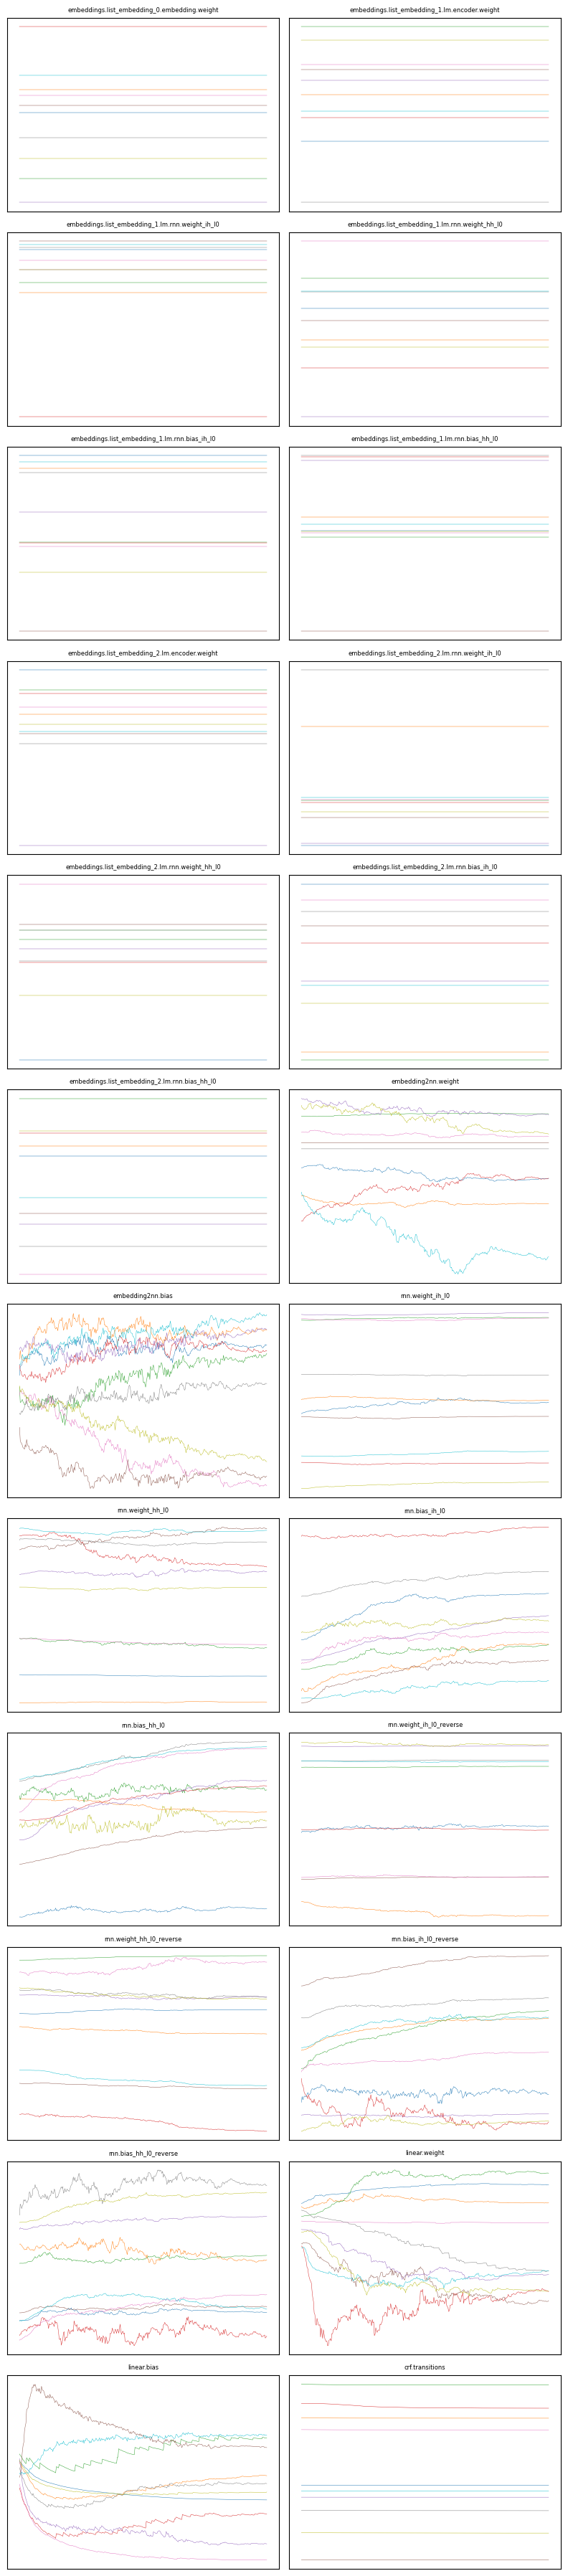

In [24]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')